In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks") 
import math
import itertools

from scipy import stats

from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

In [17]:
def load_behav_data(steep_list):
    
    steep_dict = {}
    steep_dict['total'] = {}

    runTime_dum = []
    for key in steep_dict.keys():
        steep_dict[key]['runDuration'] = []
        steep_dict[key]['NumberRuns'] = []
        
    for i in range(len(steep_list)):
        runTime_dum += [float(value) for value in list(pd.read_csv(steep_list[i]+'_Dispersion_RunDurs_eachRun_AllTracks.csv',header=None).stack()) if not np.isnan(float(value))]
    
    for i in range(len(runTime_dum)):
        steep_dict['total']['runDuration'].append(runTime_dum[i])
    
    steep_dict['total']['NumberRuns'] = len(steep_dict['total']['runDuration'])
    return steep_dict

        

In [18]:
def plot_distributions(dict_list, direction, metric, bins=18, hist_bool = True):

    plt.clf()
    plt.figure(figsize=(6,4),dpi=300)
    
    
    palette = itertools.cycle(sns.color_palette("Paired"))

    for i in range(len(dict_list)):
        c=next(palette)
        sns.distplot(dict_list[i][direction][metric], bins = bins, color = c, label = dict_list[i]['label']+', N='+str(len(dict_list[i][direction][metric]))+' runs', hist = hist_bool)
        plt.axvline(x=np.median(dict_list[i][direction][metric]), color=c, linewidth=2, label = 'median='+str(np.median(dict_list[i][direction][metric])), alpha=0.8, linestyle=':')
    
    plt.ylim(ymin=0)
    #plt.xlim(0,10)
    #plt.legend(fontsize = 12, loc='upper right')
    handles, labels = plt.gca().get_legend_handles_labels()
    if hist_bool == True:
        order_first = range(len(dict_list),len(dict_list)*2) 
        order_second = range(len(dict_list))
        order = []
        for i in range(len(order_first)):
            order.append(order_first[i])
            order.append(order_second[i])
        #print order
        #order = [6,0,7,1,8,2,9,3,10,4,11,5]
    else:
        order = range(len(dict_list)*2) 
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize = 8, loc='upper right')
    sns.despine()
    plt.xlabel(str(metric))
    plt.ylabel('Estimated Proportion of Runs')
    plt.title(direction+' runs')
    #plt.xticks(fontsize=10)
    #plt.savefig('Soma_Ratio_Derivative_Dist.png')
    plt.show()
    plt.close()

## DCR 5283 inx1(gk)

In [19]:
step = math.pi/8

dir1 = 'C:/Users/dgmdi/OneDrive - Yale University/Documents/Ttx_Dispersion_Analysis/Using IT scoreater/WT background/Postcleans/CSVs-PrevChosenConfig/'

dcr5283steep_list = [dir1+'231005_DCR5283inx1gk',dir1+'231006_DCR5283inx1gk', dir1+'231010_DCR5283inx1gk'
                    ]
dcr5283steep_dict = load_behav_data(dcr5283steep_list)
dcr5283steep_dict['label'] = 'inx-1(gk)'

## DCR 5281 inx1(tm)

In [20]:

dir1 = 'C:/Users/dgmdi/OneDrive - Yale University/Documents/Ttx_Dispersion_Analysis/Using IT scoreater/WT background/Postcleans/CSVs-PrevChosenConfig/'

                           
dcr5281steep_list = [dir1+'231005_DCR5281inx1tm', dir1+'231006_DCR5281inx1tm', dir1+'231010_DCR5281inx1tm'
                     ]
dcr5281steep_dict = load_behav_data(dcr5281steep_list)
dcr5281steep_dict['label'] = 'inx-1(tm)'

## N2 

In [22]:
step = math.pi/8

dir1 = 'C:/Users/dgmdi/OneDrive - Yale University/Documents/Ttx_Dispersion_Analysis/Using IT scoreater/WT background/Postcleans/CSVs-PrevChosenConfig/'

N2steep_list = [dir1+'231011_N2_rep1', dir1+'231011_N2_rep2', dir1+'231011_N2_rep3'
                    ]
N2steep_dict = load_behav_data(N2steep_list)
N2steep_dict['label'] = 'WT'

## DCR7342 inx1ola375

In [23]:

dir1 = 'C:/Users/dgmdi/OneDrive - Yale University/Documents/Ttx_Dispersion_Analysis/Using IT scoreater/WT background/Postcleans/CSVs-PrevChosenConfig/'


ola375steep_list = [dir1+'231005_DCR7342ola375', dir1+'231006_DCR7342ola375', dir1+'231010_DCR7342ola375'
                     ]
ola375steep_dict = load_behav_data(ola375steep_list)
ola375steep_dict['label'] = 'inx1(ola375)'

# Statistical Test

## N2 vs dcr5283 (N2 vs inx(gk) )

In [17]:
# Perform the Mann-Whitney U test
N2RunDur = N2steep_dict['total']['runDuration']
dcr5283RunDur = dcr5283steep_dict['total']['runDuration']

statistic, p_value = stats.mannwhitneyu(N2RunDur, dcr5283RunDur, alternative='two-sided')
# alternative can be 'two-sided', 'less', or 'greater' depending on your hypothesis

# Print the test results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Mann-Whitney U statistic: 490658.0
P-value: 2.481188400648955e-07
Reject the null hypothesis: There is a significant difference between the two groups.


## N2 vs dcr5281 (N2 vs inx1(tm) )

In [18]:
# Perform the Mann-Whitney U test
N2RunDur = N2steep_dict['total']['runDuration']
dcr5281RunDur = dcr5281steep_dict['total']['runDuration']

statistic, p_value = stats.mannwhitneyu(N2RunDur, dcr5281RunDur, alternative='two-sided')
# alternative can be 'two-sided', 'less', or 'greater' depending on your hypothesis

# Print the test results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Mann-Whitney U statistic: 445947.0
P-value: 0.00030777380904188845
Reject the null hypothesis: There is a significant difference between the two groups.


## N2 vs ola375

In [19]:
# Perform the Mann-Whitney U test
N2RunDur = N2steep_dict['total']['runDuration']
ola375RunDur = ola375steep_dict['total']['runDuration']

statistic, p_value = stats.mannwhitneyu(N2RunDur, ola375RunDur, alternative='two-sided')
# alternative can be 'two-sided', 'less', or 'greater' depending on your hypothesis

# Print the test results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Mann-Whitney U statistic: 360014.0
P-value: 1.8778538981282412e-10
Reject the null hypothesis: There is a significant difference between the two groups.


# Plot Distributions

C:\Users\dgmdi\AppData\Local\Temp\ipykernel_39956\3213765744.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dict_list[i][direction][metric], bins = bins, color = c, label = dict_list[i]['label']+', N='+str(len(dict_list[i][direction][metric]))+' runs', hist = hist_bool)
C:\Users\dgmdi\AppData\Local\Temp\ipykernel_39956\3213765744.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new function

<Figure size 640x480 with 0 Axes>

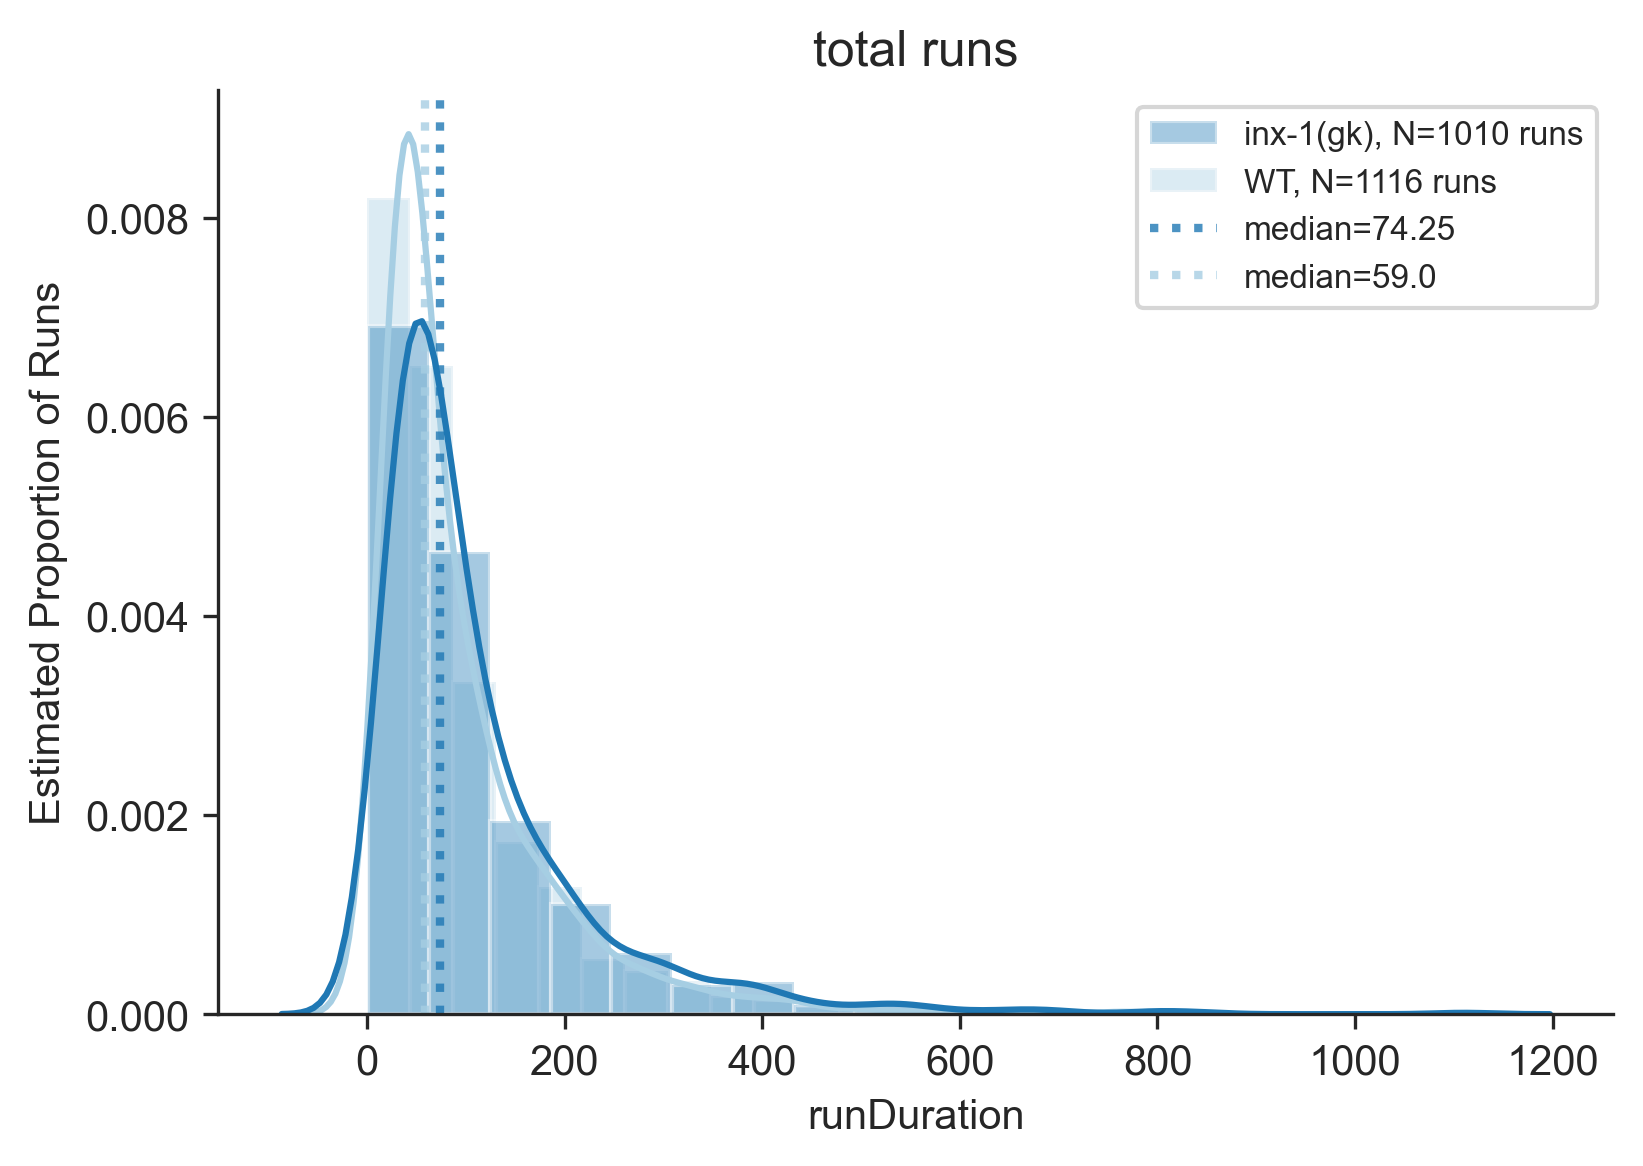

In [11]:
dict_list = [ N2steep_dict, dcr5283steep_dict ]

plot_distributions(dict_list, 'total', 'runDuration')

C:\Users\dgmdi\AppData\Local\Temp\ipykernel_39956\3213765744.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dict_list[i][direction][metric], bins = bins, color = c, label = dict_list[i]['label']+', N='+str(len(dict_list[i][direction][metric]))+' runs', hist = hist_bool)
C:\Users\dgmdi\AppData\Local\Temp\ipykernel_39956\3213765744.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new function

<Figure size 640x480 with 0 Axes>

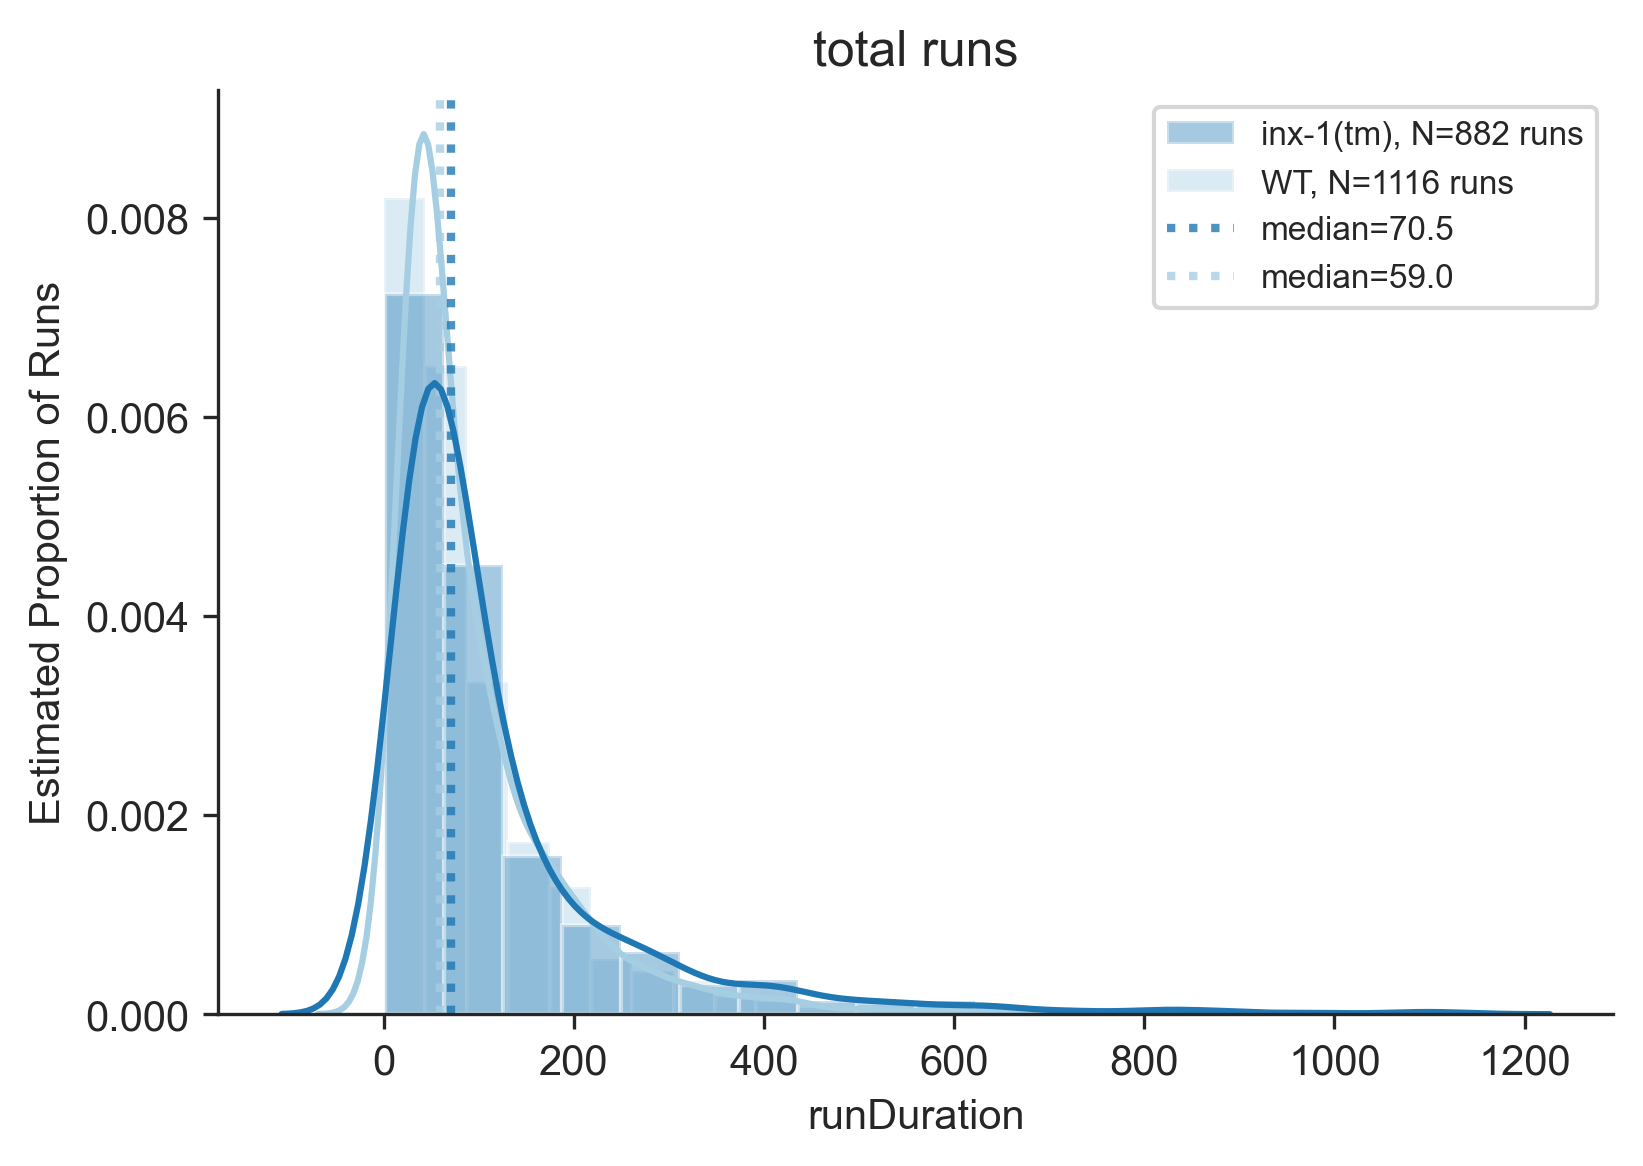

In [12]:
dict_list = [ N2steep_dict, dcr5281steep_dict ]

plot_distributions(dict_list, 'total', 'runDuration')

C:\Users\dgmdi\AppData\Local\Temp\ipykernel_39956\3213765744.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dict_list[i][direction][metric], bins = bins, color = c, label = dict_list[i]['label']+', N='+str(len(dict_list[i][direction][metric]))+' runs', hist = hist_bool)
C:\Users\dgmdi\AppData\Local\Temp\ipykernel_39956\3213765744.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new function

<Figure size 640x480 with 0 Axes>

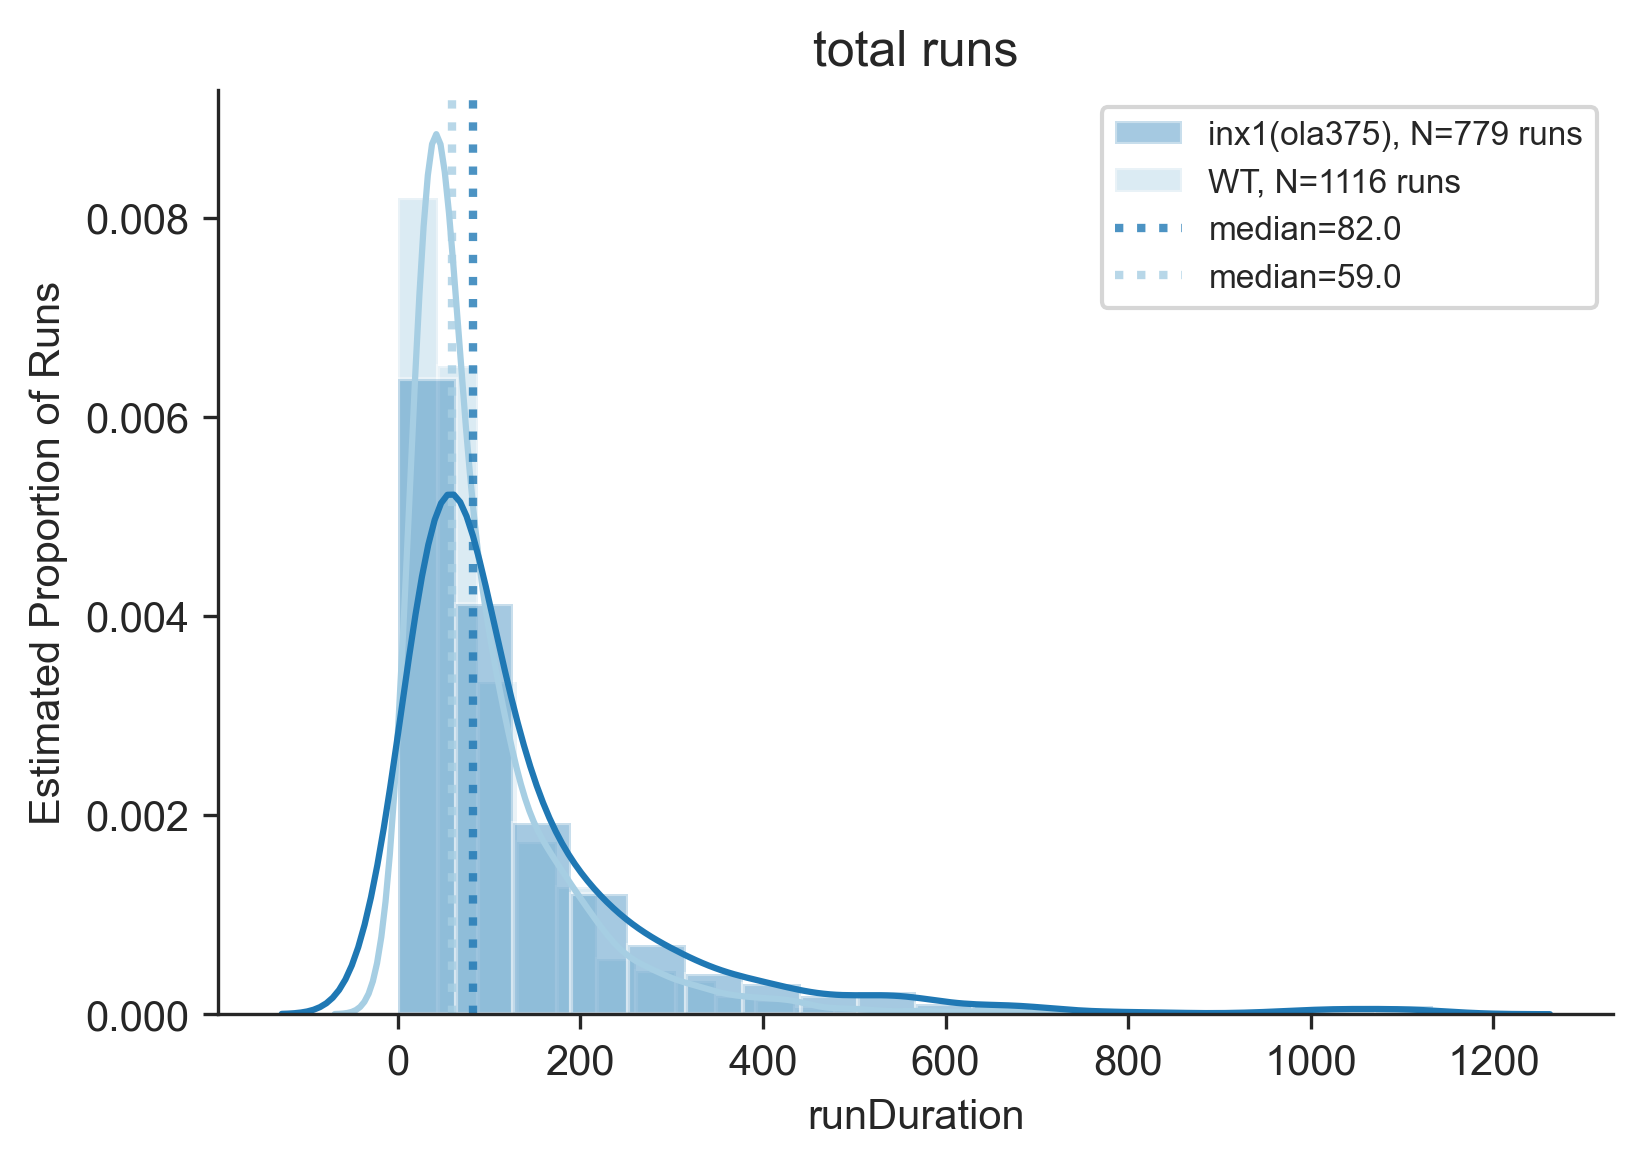

In [16]:
dict_list = [ N2steep_dict, ola375steep_dict ]

plot_distributions(dict_list, 'total', 'runDuration')

# Plotting 

In [34]:
print(np.mean(N2steep_dict['total']['runDuration']))
print(np.mean(ola375steep_dict['total']['runDuration']))
print(np.mean(dcr5283steep_dict['total']['runDuration']))
print(np.mean(dcr5281steep_dict['total']['runDuration']))
print('now the medians')
print(np.median(N2steep_dict['total']['runDuration']))
print(np.median(ola375steep_dict['total']['runDuration']))
print(np.median(dcr5283steep_dict['total']['runDuration']))
print(np.median(dcr5281steep_dict['total']['runDuration']))

94.70878136200717
138.68870346598203
113.92128712871288
119.96315192743764
now the medians
59.0
82.0
74.25
70.5


In [24]:
labels = [ N2steep_dict['label'], 
          #dcr5283steep_dict['label'], 
          #dcr5281steep_dict['label'], 
          ola375steep_dict['label'] 
         ]
sets = [
    N2steep_dict['total']['runDuration'],
    #dcr5283steep_dict['total']['runDuration'],
    #dcr5281steep_dict['total']['runDuration'],
    ola375steep_dict['total']['runDuration'] 
]


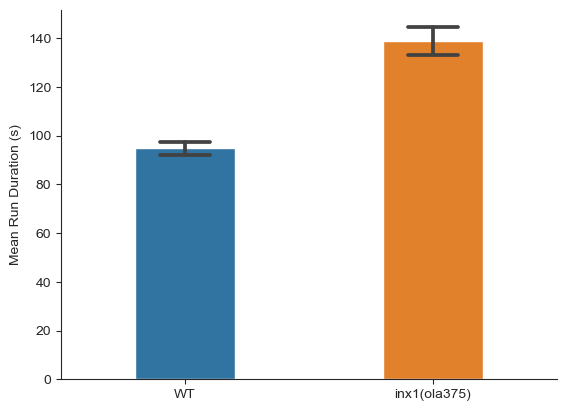

In [25]:

# Create a DataFrame
df = pd.DataFrame({
    'Conds': [labels[0]]*len(sets[0]) + 
    #[labels[1]]*len(sets[1]) + 
    #[labels[2]]*len(sets[2]) + 
    [labels[1]]*len(sets[1]),
    
    'RunDur': sets[0] + 
    #sets[1] + 
    #sets[2] + 
    sets[1]
 })

# Create the barplot
sns.barplot(x='Conds', y='RunDur', data=df, errorbar = "se", capsize = 0.2, width = 0.4 )
plt.xlabel('')
plt.ylabel('Mean Run Duration (s)')
sns.despine()
# Show the plot
plt.savefig('C:/Users/dgmdi\OneDrive - Yale University/Documents/Inx1 Paper/Dispersion_Analysis_Audit/DispAssays_Std.svg', format='svg')
plt.show()
